# 01. Classification 

앙상블: 앙상블의 앙상블= 스태킹 / 결정 트리: 과적합 주의

부스팅: Gradient Boosting, XgBoost

# 02. Decision Tree
규칙 노드, 리프 노드-> 서브 트리

적은 결정 노드로 높은 예측 정확도: 균일한 데이터 세트 구성

균일도 측정: 엔트로피를 이용한 정보 이득 지수, 지니 계수

### * Decision Tree Characteristic

overfitting -> Low Accuracy ; Solution: Limit the size of the tree in advance

### * Decision Tree Parameter

### * Decision Tree Visualization 



In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dt_clf=DecisionTreeClassifier(random_state=156)

iris_data=load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=156)

In [2]:
from sklearn.tree import export_graphviz
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names,impurity=True, filled=True)

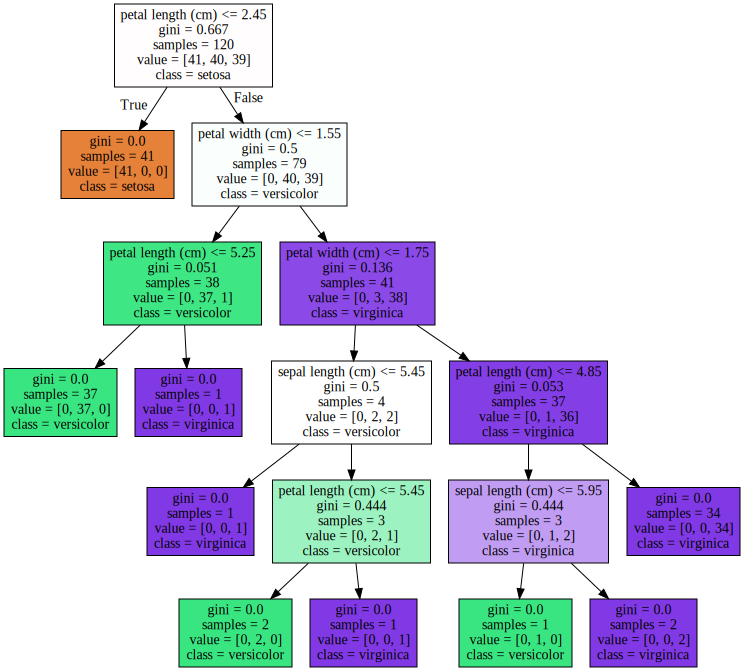

In [3]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

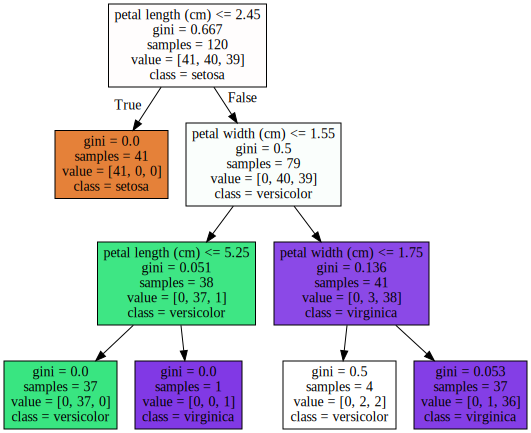

In [4]:
dt_clf=DecisionTreeClassifier(max_depth=3, random_state=156)

iris_data=load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(x_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names,impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

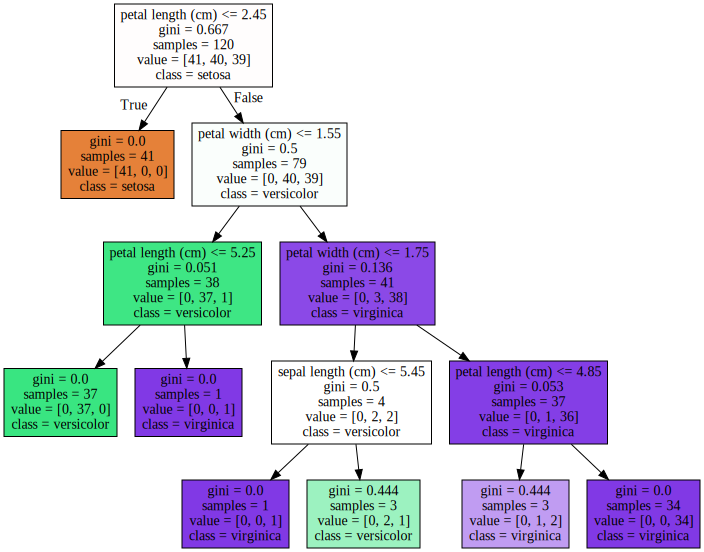

In [5]:
dt_clf=DecisionTreeClassifier(min_samples_split=4, random_state=156)

iris_data=load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(x_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names,impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

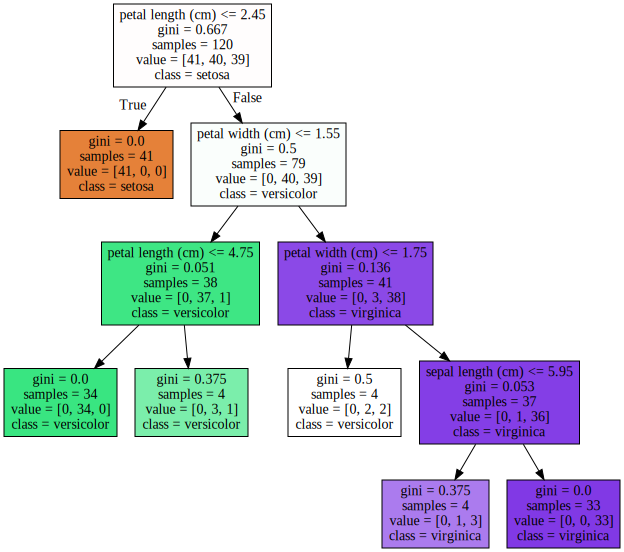

In [6]:
dt_clf=DecisionTreeClassifier(min_samples_leaf=4, random_state=156)

iris_data=load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

dt_clf.fit(x_train, y_train)

export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names, \
                feature_names=iris_data.feature_names,impurity=True, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

Feature importances:
[0.006 0.    0.546 0.448]
sepal length (cm), : 0.006
sepal width (cm), : 0.000
petal length (cm), : 0.546
petal width (cm), : 0.448


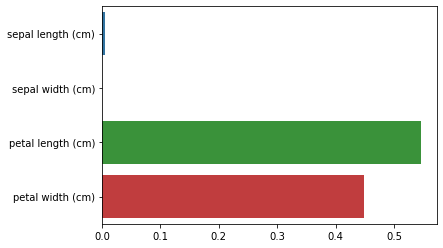

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}, : {1:.3f}'.format(name, value))
    
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names);

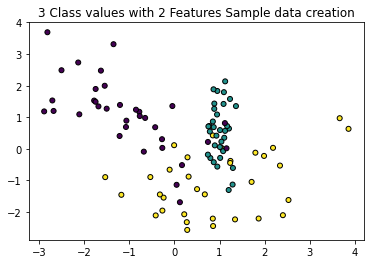

In [8]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, 
                                          n_classes=3, n_clusters_per_class=1, random_state=0)

plt.scatter(x_features[:,0], x_features[:,1], marker='o', c=y_labels, s=25, edgecolor='k');

In [9]:
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

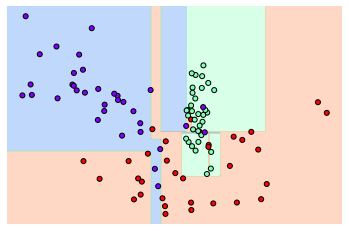

In [10]:
from sklearn.tree import DecisionTreeClassifier

dt_clf=DecisionTreeClassifier().fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

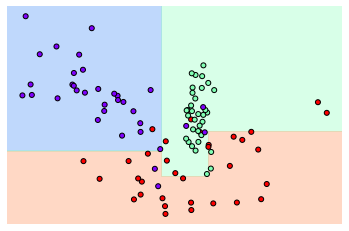

In [11]:
dt_clf=DecisionTreeClassifier(min_samples_leaf=6).fit(x_features, y_labels)
visualize_boundary(dt_clf, x_features, y_labels)

In [12]:
import pandas as pd

feature_name_df = pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, 
                              names = ['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist()

print('Extract only 10 from all feature names:\n\n', feature_name[:10])

Extract only 10 from all feature names:

 ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


In [13]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [3]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name']=new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'-'+str(x[1]) if x[1]>0 else x[0], axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [4]:
import pandas as pd

def get_human_dataset():
    feature_name_df=pd.read_csv('./human_activity/features.txt', sep='\s+', header=None, 
                              names = ['column_index', 'column_name'])
    new_feature_name_df=get_new_feature_name_df(feature_name_df)
    feature_name=new_feature_name_df.iloc[:,1].values.tolist()
    
    X_train = pd.read_csv('./human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('./human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [16]:
print('## train feature dataset info()')
print(X_train.info())

## train feature dataset info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [17]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_clf=DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred=dt_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('Accuracy of Decision Tree Prediction: {0:.4f}'.format(accuracy))
print('\nDecisionTreeClassifier Original Hyper Parameter:\n', dt_clf.get_params())

Accuracy of Decision Tree Prediction: 0.8548

DecisionTreeClassifier Original Hyper Parameter:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': 156, 'splitter': 'best'}


In [19]:
from sklearn.model_selection import GridSearchCV

params={'max_depth' : [6,8,10,12,16,20,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV Best Mean accuracy:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV Best Hyper Parameter:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.2min finished


GridSearchCV Best Mean accuracy:0.8513
GridSearchCV Best Hyper Parameter: {'max_depth': 16}


In [20]:
cv_results_df=pd.DataFrame(grid_cv.cv_results_)
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [21]:
max_depths=[6,8,10,12,16,20,24]
for depth in max_depths:
    dt_clf=DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred=dt_clf.predict(X_test)
    accuracy=accuracy_score(y_test, pred)
    print('max_depth = {0} Accuracy: {1:.4f}'.format(depth, accuracy))

max_depth = 6 Accuracy: 0.8558
max_depth = 8 Accuracy: 0.8707
max_depth = 10 Accuracy: 0.8673
max_depth = 12 Accuracy: 0.8646
max_depth = 16 Accuracy: 0.8575
max_depth = 20 Accuracy: 0.8548
max_depth = 24 Accuracy: 0.8548


In [22]:
params={'max_depth' : [8,12,16,20], 'min_samples_split' : [16,24]}

grid_cv=GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)

print('GridSearchCV Best Mean accuracy:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV Best Hyper Parameter:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.4min finished


GridSearchCV Best Mean accuracy:0.8549
GridSearchCV Best Hyper Parameter: {'max_depth': 8, 'min_samples_split': 16}


In [23]:
best_df_clf=grid_cv.best_estimator_
pred1=best_df_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred1)
print('Accuracy of Decision Tree Prediction: {0:.4f}'.format(accuracy))

Accuracy of Decision Tree Prediction: 0.8717


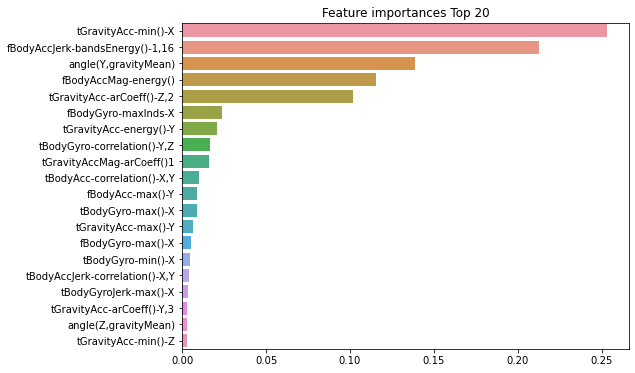

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values=best_df_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)

ftr_top20=ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show();

# 03. Ensemble Learning
### * Ensemble Learning Outline
- 정형데이터 분류 시 유용
- Voting / Bagging / Boosting / Stacking

### * Hard Voting & Soft Voting
- Hard Voting: 다수의 분류기가 결정한 예측값을 최종 보팅 결과값으로 선정하는 방법
- Soft Voting: 분류기들의 레이블 값 결정 확률 값을 평균하여 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정하는 방법 (예측 성능이 더 좋음)

### * Voting Classifier

In [25]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer=load_breast_cancer()

data_df=pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
lr_clf=LogisticRegression(solver='liblinear')
knn_clf=KNeighborsClassifier(n_neighbors=8)

vo_clf=VotingClassifier(estimators=[('LR', lr_clf), ('KNN', knn_clf)], voting='soft')

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

vo_clf.fit(x_train, y_train)
pred=vo_clf.predict(x_test)
print('Accuracy of Voting Classifier: {0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(x_train, y_train)
    pred=classifier.predict(x_test)
    class_name=classifier.__class__.__name__
    print('Accuracy of {0}: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Accuracy of Voting Classifier: 0.9561
Accuracy of LogisticRegression: 0.9474
Accuracy of KNeighborsClassifier: 0.9386


In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

rf_clf=RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test, pred)
print('Accuracy of RandomForest: {0:.4f}'.format(accuracy))

Accuracy of RandomForest: 0.9253


In [28]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators' : [100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]

}

rf_clf=RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv=GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('Best Hyper Parameter:\n', grid_cv.best_params_)
print('Accuracy of Best Prediction:{0:.4f}'.format(grid_cv.best_score_))

Best Hyper Parameter:
 {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
Accuracy of Best Prediction:0.9180


In [29]:
rf_clf1=RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, 
                               min_samples_split=8, random_state=0)
rf_clf1.fit(X_train, y_train)
pred=rf_clf1.predict(X_test)
print('Accuracy of Prediction: {0:.4f}'.format(accuracy_score(y_test, pred)))

Accuracy of Prediction: 0.9165


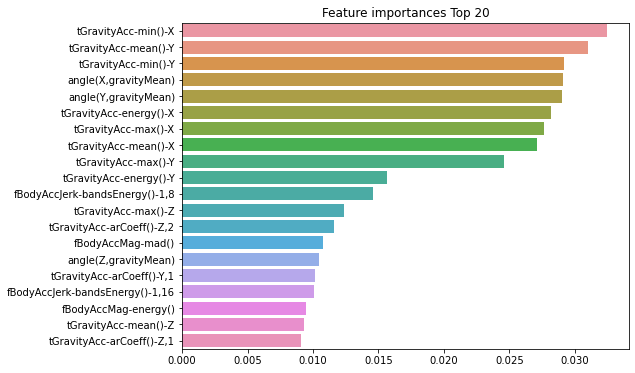

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

ftr_importances_values=rf_clf1.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show();

# 05. GBM(Gradient Boosting Machine)

### * GBM outline & practice

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

start_time=time.time()

gb_clf=GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test, gb_pred)

print('Accuracy of GradientBoosting: {0:.4f}'.format(gb_accuracy))
print('Execution time of GradientBoosting: {0:.1f} sec'.format(time.time()-start_time))

Accuracy of GradientBoosting: 0.9393
Execution time of GradientBoosting: 518.3 sec


In [ ]:
from sklearn.model_selection import GridSearchCV

params={
    'n_estimators' : [100, 500],
    'learning_rate' : [0.05, 0.1]

}

grid_cv=GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)

print('Best Hyper Parameter:\n', grid_cv.best_params_)
print('Accuracy of Best Prediction:{0:.4f}'.format(grid_cv.best_score_))

In [ ]:
gd_pred=grid_cv.best_estimator_.predict(X_test)
gd_accuracy=accuracy_score(y_test, gb_pred)
print('Accuracy of GBM: {0:.4f}'.format(gb_accuracy))

# 06. XGBoost

In [34]:
import xgboost
print(xgboost.__version__)

1.3.3


In [35]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
x_features=dataset.data
y_label=dataset.target

cancer_df=pd.DataFrame(data=x_features, columns=dataset.feature_names)
cancer_df['target']=y_label
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [36]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [37]:
x_train, x_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=156)
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [38]:
dtrain=xgb.DMatrix(data=x_train, label=y_train)
dtest=xgb.DMatrix(data=x_test, label=y_test)

In [39]:
params = {'max_depth':3, 'eta':0.1, 'objective':'binary:logistic', 'eval_metric':'logloss', 'early_stoppings':100}
num_rounds=400

In [40]:
wlist=[(dtrain, 'train'), (dtest, 'test')]
xgb_model=xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)

[21:28:35] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	test-logloss:0.61352
[1]	train-logloss:0.54080	test-logloss:0.54784
[2]	train-logloss:0.48375	test-logloss:0.49425
[3]	train-logloss:0.43446	test-logloss:0.44799
[4]	train-logloss:0.39055	test-logloss:0.40911
[5]	train-logloss:0.35414	test-logloss:0.37498
[6]	train-logloss:0.32122	test-logloss:0.34571
[7]	train-logloss:0.29259	test-logloss:0.32053
[8]	train-logloss:0.26747	test-logloss:0.29721
[9]	train-logloss:0.24515	test-logloss:0.27799
[10]	train-logloss:0.22569	test-logloss:0.26030
[11]	train-logloss:0.20794	test-loglos

[161]	train-logloss:0.00726	test-logloss:0.08801
[162]	train-logloss:0.00724	test-logloss:0.08776
[163]	train-logloss:0.00722	test-logloss:0.08778
[164]	train-logloss:0.00720	test-logloss:0.08778
[165]	train-logloss:0.00718	test-logloss:0.08752
[166]	train-logloss:0.00716	test-logloss:0.08754
[167]	train-logloss:0.00714	test-logloss:0.08764
[168]	train-logloss:0.00712	test-logloss:0.08739
[169]	train-logloss:0.00710	test-logloss:0.08738
[170]	train-logloss:0.00708	test-logloss:0.08730
[171]	train-logloss:0.00707	test-logloss:0.08737
[172]	train-logloss:0.00705	test-logloss:0.08740
[173]	train-logloss:0.00703	test-logloss:0.08739
[174]	train-logloss:0.00701	test-logloss:0.08713
[175]	train-logloss:0.00699	test-logloss:0.08716
[176]	train-logloss:0.00697	test-logloss:0.08696
[177]	train-logloss:0.00696	test-logloss:0.08705
[178]	train-logloss:0.00694	test-logloss:0.08697
[179]	train-logloss:0.00692	test-logloss:0.08697
[180]	train-logloss:0.00690	test-logloss:0.08704
[181]	train-logloss:

In [41]:
pred_probs=xgb_model.predict(dtest)
print(np.round(pred_probs[:10],3))
preds=[1 if x>0.5 else 0 for x in pred_probs]
print('10 Prediction:', preds[:10])

[0.934 0.003 0.91  0.094 0.993 1.    1.    0.999 0.997 0.   ]
10 Prediction: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [48]:
get_clf_eval(y_test, preds, pred_probs)

Confusion Matrix
[[35  2]
 [ 1 76]]
Accuracy: 0.9737, Precision: 0.9744, Recall: 0.9870, F1: 0.9806, AUC: 0.9951


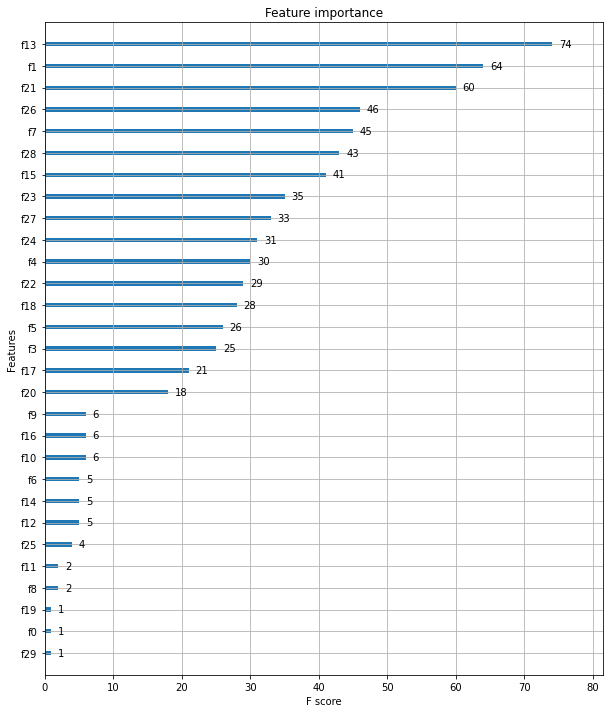

In [49]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model,ax=ax);

### * 사이킷런 래퍼 XGBoost의 개요 및 적용

In [50]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(x_train, y_train)
w_preds=xgb_wrapper.predict(x_test)
w_pred_proba=xgb_wrapper.predict_proba(x_test)[:,1]

get_clf_eval(y_test, w_preds, w_pred_proba)

[21:30:53] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Confusion Matrix
[[35  2]
 [ 1 76]]
Accuracy: 0.9737, Precision: 0.9744, Recall: 0.9870, F1: 0.9806, AUC: 0.9951


In [51]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(x_test, y_test)]
xgb_wrapper.fit(x_train, y_train,  early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
ws100_preds=xgb_wrapper.predict(x_test)
ws100_pred_proba=xgb_wrapper.predict_proba(x_test)[:,1]

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

In [52]:
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

Confusion Matrix
[[34  3]
 [ 1 76]]
Accuracy: 0.9649, Precision: 0.9620, Recall: 0.9870, F1: 0.9744, AUC: 0.9954


In [53]:
xgb_wrapper.fit(x_train, y_train,  early_stopping_rounds=10, eval_metric='logloss', eval_set=evals, verbose=True)
ws10_preds=xgb_wrapper.predict(x_test)
ws10_pred_proba=xgb_wrapper.predict_proba(x_test)[:,1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

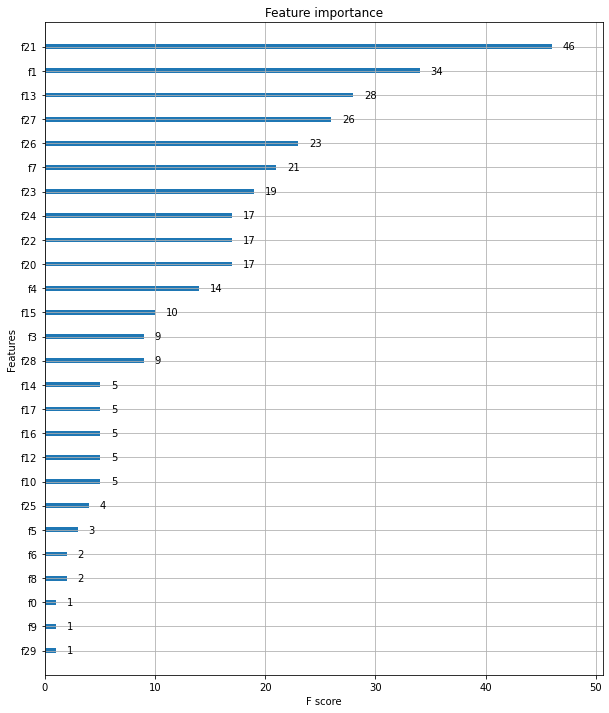

In [54]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper,ax=ax);

# 07. LightGBM
### * LightGBM 적용 - 위스콘신 유방암 예측

In [55]:
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset=load_breast_cancer()
ftr=dataset.data
target=dataset.target

x_train, x_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper=LGBMClassifier(n_estimators=400)

evals=[(x_test, y_test)]
lgbm_wrapper.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals, verbose=True)
preds=lgbm_wrapper.predict(x_test)
pred_proba=lgbm_wrapper.predict_proba(x_test)[:,1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [57]:
get_clf_eval(y_test, preds, pred_proba)

Confusion Matrix
[[33  4]
 [ 1 76]]
Accuracy: 0.9561, Precision: 0.9500, Recall: 0.9870, F1: 0.9682, AUC: 0.9905


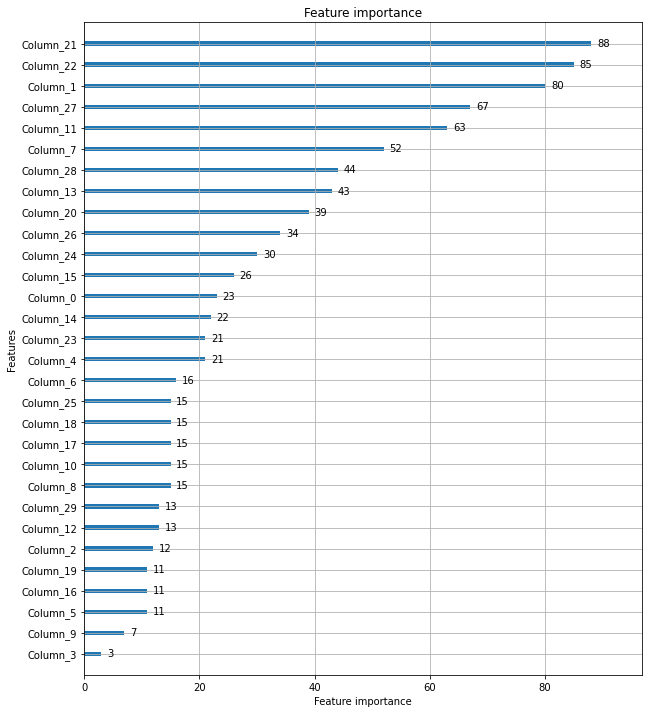

In [58]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper,ax=ax);

# 08. 분류 실습 - 캐글 산탄데르 고객 만족 예측
### * 데이터 전처리

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

cust_df=pd.read_csv('./train_santander.csv', encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [8]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [9]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt=cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt=cust_df.TARGET.count()
print('\nUnsatisfied Proportion is {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64

Unsatisfied Proportion is 0.04


In [10]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [11]:
cust_df['var3'].replace(-999999, 2, inplace=True)
cust_df.drop('ID', axis=1, inplace=True)

x_features=cust_df.iloc[:,:-1]
y_labels=cust_df.iloc[:,-1]
print('Feature Data Sahpe: {0}'.format(x_features.shape))

Feature Data Sahpe: (76020, 369)


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_features, y_labels, test_size=0.2, random_state=0)

train_cnt=y_train.count()
test_cnt=y_test.count()
print('Train dataset Shape: {0}, Test dataset Shape: {1}'.format(x_train.shape, x_test.shape))

print('\nDist Ratio of Train dataset label value')
print(y_train.value_counts()/train_cnt)
print('\nDist Ratio of Test dataset label value')
print(y_test.value_counts()/test_cnt)

Train dataset Shape: (60816, 369), Test dataset Shape: (15204, 369)

Dist Ratio of Train dataset label value
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

Dist Ratio of Test dataset label value
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### * XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf=XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])
xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

In [18]:
from sklearn.model_selection import GridSearchCV

xgb_clf=XGBClassifier(n_estimators=100)

params={'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

gridcv=GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])

print('GridSearchCV Best parameter:', gridcv.best_params_)

xgb_roc_score=roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.72220	validation_1-auc:0.72732
[1]	validation_0-auc:0.73513	validation_1-auc:0.73851
[2]	validation_0-auc:0.81328	validation_1-auc:0.81902
[3]	validation_0-auc:0.82198	validation_1-auc:0.82516
[4]	validation_0-auc:0.83082	validation_1-auc:0.83442
[5]	validation_0-auc:0.83232	validation_1-auc:0.83225
[6]	validation_0-auc:0.83027	validation_1-auc:0.83048
[7]	validation_0-auc:0.83946	validation_1-auc:0.83795
[8]	validation_0-auc:0.83789	validation_1-auc:0.83474
[9]	validation_0-auc:0.83574	validation_1-auc:0.83253
[10]	validation_0-auc:0.84508	validation_1-auc:0.83837
[11]	validation_0-auc:0.84854	validation_1-auc:0.83927
[12]	validation_0-auc:0.85110	validation_1-auc:0.83835
[13]	validation_0-auc:0.85258	validation_1-auc:0.83676
[14]	validation_0-auc:0.85447	validation_1-auc:0.83708
[15]	validation_0-auc:0.85639	validation_1-auc:0.83754
[16]	validation_0-auc:0.85744	validation_1-auc:0.83598
[17]	validation_0-auc:0.85847	validation_1-auc:0.83724
[18]	validation_0-au

[37]	validation_0-auc:0.87668	validation_1-auc:0.83871
[38]	validation_0-auc:0.87700	validation_1-auc:0.83857
[39]	validation_0-auc:0.87711	validation_1-auc:0.83844
[40]	validation_0-auc:0.87752	validation_1-auc:0.83821
[41]	validation_0-auc:0.87847	validation_1-auc:0.83825
[42]	validation_0-auc:0.87889	validation_1-auc:0.83796
[43]	validation_0-auc:0.87928	validation_1-auc:0.83779
[44]	validation_0-auc:0.87931	validation_1-auc:0.83815
[45]	validation_0-auc:0.88005	validation_1-auc:0.83787
[46]	validation_0-auc:0.88082	validation_1-auc:0.83751
[47]	validation_0-auc:0.88112	validation_1-auc:0.83732
[0]	validation_0-auc:0.72207	validation_1-auc:0.72723
[1]	validation_0-auc:0.73687	validation_1-auc:0.74013
[2]	validation_0-auc:0.81378	validation_1-auc:0.81961
[3]	validation_0-auc:0.82266	validation_1-auc:0.82451
[4]	validation_0-auc:0.83247	validation_1-auc:0.83372
[5]	validation_0-auc:0.83642	validation_1-auc:0.83544
[6]	validation_0-auc:0.83249	validation_1-auc:0.83077
[7]	validation_0-

[39]	validation_0-auc:0.87374	validation_1-auc:0.83737
[40]	validation_0-auc:0.87453	validation_1-auc:0.83740
[41]	validation_0-auc:0.87521	validation_1-auc:0.83766
[42]	validation_0-auc:0.87532	validation_1-auc:0.83758
[0]	validation_0-auc:0.72439	validation_1-auc:0.72737
[1]	validation_0-auc:0.73938	validation_1-auc:0.73942
[2]	validation_0-auc:0.81562	validation_1-auc:0.81645
[3]	validation_0-auc:0.83036	validation_1-auc:0.82345
[4]	validation_0-auc:0.84019	validation_1-auc:0.83140
[5]	validation_0-auc:0.84594	validation_1-auc:0.83409
[6]	validation_0-auc:0.84543	validation_1-auc:0.82949
[7]	validation_0-auc:0.85446	validation_1-auc:0.83333
[8]	validation_0-auc:0.85328	validation_1-auc:0.83011
[9]	validation_0-auc:0.85138	validation_1-auc:0.82921
[10]	validation_0-auc:0.85949	validation_1-auc:0.83570
[11]	validation_0-auc:0.86520	validation_1-auc:0.83706
[12]	validation_0-auc:0.86817	validation_1-auc:0.83672
[13]	validation_0-auc:0.86957	validation_1-auc:0.83495
[14]	validation_0-au

[3]	validation_0-auc:0.83176	validation_1-auc:0.82812
[4]	validation_0-auc:0.84028	validation_1-auc:0.83576
[5]	validation_0-auc:0.84506	validation_1-auc:0.83679
[6]	validation_0-auc:0.84401	validation_1-auc:0.83358
[7]	validation_0-auc:0.85267	validation_1-auc:0.83734
[8]	validation_0-auc:0.85146	validation_1-auc:0.83318
[9]	validation_0-auc:0.84991	validation_1-auc:0.83115
[10]	validation_0-auc:0.85725	validation_1-auc:0.83630
[11]	validation_0-auc:0.86184	validation_1-auc:0.83718
[12]	validation_0-auc:0.86434	validation_1-auc:0.83746
[13]	validation_0-auc:0.86504	validation_1-auc:0.83709
[14]	validation_0-auc:0.86591	validation_1-auc:0.83527
[15]	validation_0-auc:0.86804	validation_1-auc:0.83753
[16]	validation_0-auc:0.86835	validation_1-auc:0.83667
[17]	validation_0-auc:0.87010	validation_1-auc:0.83739
[18]	validation_0-auc:0.87228	validation_1-auc:0.83839
[19]	validation_0-auc:0.87261	validation_1-auc:0.83767
[20]	validation_0-auc:0.87310	validation_1-auc:0.83653
[21]	validation_0

[14]	validation_0-auc:0.85725	validation_1-auc:0.84032
[15]	validation_0-auc:0.85899	validation_1-auc:0.84053
[16]	validation_0-auc:0.86021	validation_1-auc:0.84038
[17]	validation_0-auc:0.86182	validation_1-auc:0.84012
[18]	validation_0-auc:0.86299	validation_1-auc:0.83921
[19]	validation_0-auc:0.86351	validation_1-auc:0.83914
[20]	validation_0-auc:0.86435	validation_1-auc:0.83847
[21]	validation_0-auc:0.86503	validation_1-auc:0.83783
[22]	validation_0-auc:0.86530	validation_1-auc:0.83775
[23]	validation_0-auc:0.86621	validation_1-auc:0.83700
[24]	validation_0-auc:0.86639	validation_1-auc:0.83692
[25]	validation_0-auc:0.86770	validation_1-auc:0.83656
[26]	validation_0-auc:0.86837	validation_1-auc:0.83787
[27]	validation_0-auc:0.86858	validation_1-auc:0.83787
[28]	validation_0-auc:0.86918	validation_1-auc:0.83814
[29]	validation_0-auc:0.87004	validation_1-auc:0.83733
[30]	validation_0-auc:0.87023	validation_1-auc:0.83748
[31]	validation_0-auc:0.87051	validation_1-auc:0.83693
[32]	valid

[15]	validation_0-auc:0.85768	validation_1-auc:0.83819
[16]	validation_0-auc:0.85917	validation_1-auc:0.83838
[17]	validation_0-auc:0.86043	validation_1-auc:0.83915
[18]	validation_0-auc:0.86136	validation_1-auc:0.83859
[19]	validation_0-auc:0.86188	validation_1-auc:0.83918
[20]	validation_0-auc:0.86261	validation_1-auc:0.83967
[21]	validation_0-auc:0.86313	validation_1-auc:0.83985
[22]	validation_0-auc:0.86406	validation_1-auc:0.83952
[23]	validation_0-auc:0.86425	validation_1-auc:0.83905
[24]	validation_0-auc:0.86440	validation_1-auc:0.83868
[25]	validation_0-auc:0.86483	validation_1-auc:0.83834
[26]	validation_0-auc:0.86525	validation_1-auc:0.83852
[27]	validation_0-auc:0.86601	validation_1-auc:0.83891
[28]	validation_0-auc:0.86665	validation_1-auc:0.83869
[29]	validation_0-auc:0.86665	validation_1-auc:0.83826
[30]	validation_0-auc:0.86714	validation_1-auc:0.83815
[31]	validation_0-auc:0.86739	validation_1-auc:0.83751
[32]	validation_0-auc:0.86748	validation_1-auc:0.83717
[33]	valid

[10]	validation_0-auc:0.86322	validation_1-auc:0.83489
[11]	validation_0-auc:0.86907	validation_1-auc:0.83781
[12]	validation_0-auc:0.87310	validation_1-auc:0.83854
[13]	validation_0-auc:0.87408	validation_1-auc:0.83708
[14]	validation_0-auc:0.87604	validation_1-auc:0.83756
[15]	validation_0-auc:0.87752	validation_1-auc:0.83704
[16]	validation_0-auc:0.88055	validation_1-auc:0.83585
[17]	validation_0-auc:0.88147	validation_1-auc:0.83646
[18]	validation_0-auc:0.88209	validation_1-auc:0.83513
[19]	validation_0-auc:0.88262	validation_1-auc:0.83543
[20]	validation_0-auc:0.88295	validation_1-auc:0.83428
[21]	validation_0-auc:0.88472	validation_1-auc:0.83532
[22]	validation_0-auc:0.88563	validation_1-auc:0.83450
[23]	validation_0-auc:0.88604	validation_1-auc:0.83445
[24]	validation_0-auc:0.88605	validation_1-auc:0.83409
[25]	validation_0-auc:0.88721	validation_1-auc:0.83347
[26]	validation_0-auc:0.88752	validation_1-auc:0.83330
[27]	validation_0-auc:0.88778	validation_1-auc:0.83306
[28]	valid

[29]	validation_0-auc:0.88096	validation_1-auc:0.83287
[30]	validation_0-auc:0.88111	validation_1-auc:0.83280
[31]	validation_0-auc:0.88119	validation_1-auc:0.83230
[32]	validation_0-auc:0.88214	validation_1-auc:0.83101
[33]	validation_0-auc:0.88285	validation_1-auc:0.83052
[34]	validation_0-auc:0.88288	validation_1-auc:0.83053
[35]	validation_0-auc:0.88303	validation_1-auc:0.83012
[0]	validation_0-auc:0.74200	validation_1-auc:0.74116
[1]	validation_0-auc:0.75955	validation_1-auc:0.75707
[2]	validation_0-auc:0.82727	validation_1-auc:0.82101
[3]	validation_0-auc:0.84050	validation_1-auc:0.83482
[4]	validation_0-auc:0.84695	validation_1-auc:0.83888
[5]	validation_0-auc:0.85271	validation_1-auc:0.83928
[6]	validation_0-auc:0.85198	validation_1-auc:0.83294
[7]	validation_0-auc:0.85779	validation_1-auc:0.83469
[8]	validation_0-auc:0.85641	validation_1-auc:0.83597
[9]	validation_0-auc:0.85469	validation_1-auc:0.83162
[10]	validation_0-auc:0.86324	validation_1-auc:0.83527
[11]	validation_0-au

[44]	validation_0-auc:0.91100	validation_1-auc:0.83542
[45]	validation_0-auc:0.91112	validation_1-auc:0.83533
[46]	validation_0-auc:0.91150	validation_1-auc:0.83487
[47]	validation_0-auc:0.91168	validation_1-auc:0.83471
GridSearchCV Best parameter: {'colsample_bytree': 0.5, 'max_depth': 7, 'min_child_weight': 3}
ROC AUC: 0.8430


In [21]:
xgb_clf=XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)
xgb_clf.fit(x_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])
xgb_roc_score=roc_auc_score(y_test, xgb_clf.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.75494	validation_1-auc:0.75869
[1]	validation_0-auc:0.81631	validation_1-auc:0.81861
[2]	validation_0-auc:0.83238	validation_1-auc:0.82547
[3]	validation_0-auc:0.83570	validation_1-auc:0.82720
[4]	validation_0-auc:0.83704	validation_1-auc:0.82693
[5]	validation_0-auc:0.83875	validation_1-auc:0.82952
[6]	validation_0-auc:0.83841	validation_1-auc:0.82939
[7]	validation_0-auc:0.83721	validation_1-auc:0.82850
[8]	validation_0-auc:0.83838	validation_1-auc:0.82907
[9]	validation_0-auc:0.83992	validation_1-auc:0.83026
[10]	validation_0-auc:0.84061	validation_1-auc:0.83057
[11]	validation_0-auc:0.84108	validation_1-auc:0.83074
[12]	validation_0-auc:0.84111	validation_1-auc:0.83051
[13]	validation_0-auc:0.84200	validation_1-auc:0.83016
[14]	validation_0-auc:0.84327	validation_1-auc:0.83179
[15]	validation_0-auc:0.84261	validation_1-auc:0.83057
[16]	validation_0-auc:0.84280	validation_1-auc:0.83029
[17]	validation_0-auc:0.84477	validation_1-auc:0.83381
[18]	validation_0-au

[149]	validation_0-auc:0.88003	validation_1-auc:0.84427
[150]	validation_0-auc:0.88009	validation_1-auc:0.84423
[151]	validation_0-auc:0.88025	validation_1-auc:0.84439
[152]	validation_0-auc:0.88057	validation_1-auc:0.84440
[153]	validation_0-auc:0.88088	validation_1-auc:0.84454
[154]	validation_0-auc:0.88103	validation_1-auc:0.84465
[155]	validation_0-auc:0.88127	validation_1-auc:0.84468
[156]	validation_0-auc:0.88156	validation_1-auc:0.84487
[157]	validation_0-auc:0.88166	validation_1-auc:0.84482
[158]	validation_0-auc:0.88193	validation_1-auc:0.84486
[159]	validation_0-auc:0.88212	validation_1-auc:0.84496
[160]	validation_0-auc:0.88223	validation_1-auc:0.84475
[161]	validation_0-auc:0.88248	validation_1-auc:0.84500
[162]	validation_0-auc:0.88251	validation_1-auc:0.84501
[163]	validation_0-auc:0.88277	validation_1-auc:0.84503
[164]	validation_0-auc:0.88308	validation_1-auc:0.84514
[165]	validation_0-auc:0.88314	validation_1-auc:0.84505
[166]	validation_0-auc:0.88325	validation_1-auc:

[296]	validation_0-auc:0.90416	validation_1-auc:0.84467
[297]	validation_0-auc:0.90424	validation_1-auc:0.84468
[298]	validation_0-auc:0.90429	validation_1-auc:0.84465
[299]	validation_0-auc:0.90441	validation_1-auc:0.84461
[300]	validation_0-auc:0.90448	validation_1-auc:0.84457
[301]	validation_0-auc:0.90450	validation_1-auc:0.84458
[302]	validation_0-auc:0.90459	validation_1-auc:0.84459
[303]	validation_0-auc:0.90463	validation_1-auc:0.84457
[304]	validation_0-auc:0.90472	validation_1-auc:0.84445
[305]	validation_0-auc:0.90487	validation_1-auc:0.84440
[306]	validation_0-auc:0.90491	validation_1-auc:0.84444
[307]	validation_0-auc:0.90497	validation_1-auc:0.84441
[308]	validation_0-auc:0.90517	validation_1-auc:0.84443
[309]	validation_0-auc:0.90520	validation_1-auc:0.84439
[310]	validation_0-auc:0.90524	validation_1-auc:0.84436
[311]	validation_0-auc:0.90530	validation_1-auc:0.84439
[312]	validation_0-auc:0.90551	validation_1-auc:0.84439
[313]	validation_0-auc:0.90556	validation_1-auc:

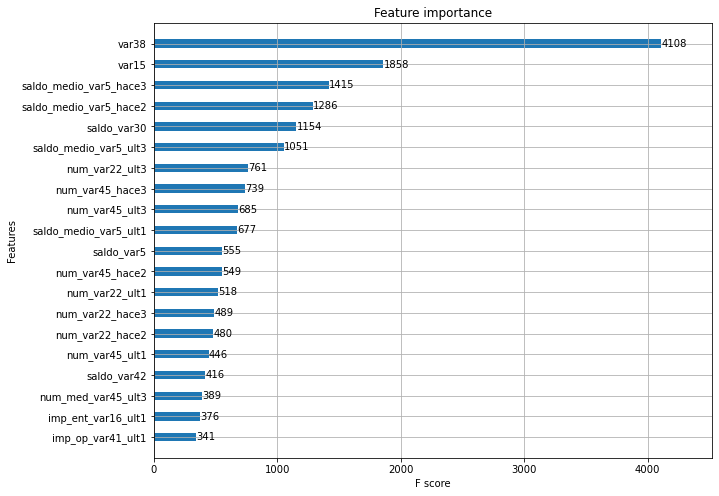

In [22]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4);

### * LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [23]:
from lightgbm import LGBMClassifier

lgbm_clf=LGBMClassifier(n_estimators=500)
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(x_test, y_test)])
lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

In [24]:
from sklearn.model_selection import GridSearchCV

xgb_clf=XGBClassifier(n_estimators=200)

params={'num_leaves':[32,64], 'max_depth':[128,160], 'min_child_samples':[60,100], 'subsample':[0.8,1]}

gridcv=GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(x_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(x_train, y_train), (x_test, y_test)])

print('GridSearchCV Best parameter:', gridcv.best_params_)

lgbm_roc_score=roc_auc_score(y_test, gridcv.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164992
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.825778	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821835	valid_1's binary_logloss: 0.159874
[3]	valid_0's auc: 0.832262	valid_0's binary_logloss: 0.147158	valid_1's auc: 0.826533	valid_1's binary_logloss: 0.156346
[4]	valid_0's auc: 0.83865	valid_0's binary_logloss: 0.144126	valid_1's auc: 0.833166	valid_1's binary_logloss: 0.1534
[5]	valid_0's auc: 0.842822	valid_0's binary_logloss: 0.141725	valid_1's auc: 0.836448	valid_1's binary_logloss: 0.151167
[6]	valid_0's auc: 0.844702	valid_0's binary_logloss: 0.139642	valid_1's auc: 0.837094	valid_1's binary_logloss: 0.149356
[7]	valid_0's auc: 0.847144	valid_0's binary_logloss: 0.13794	valid_1's auc: 0.837965	valid_1's binary_logloss: 0.147853
[8]	valid_0's auc: 0.848277	valid_0's binary_logloss: 0.136499	valid_1's auc: 0.837663	val

[1]	valid_0's auc: 0.821645	valid_0's binary_logloss: 0.156528	valid_1's auc: 0.81857	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827488	valid_0's binary_logloss: 0.151189	valid_1's auc: 0.822299	valid_1's binary_logloss: 0.160072
[3]	valid_0's auc: 0.837855	valid_0's binary_logloss: 0.147263	valid_1's auc: 0.829855	valid_1's binary_logloss: 0.156527
[4]	valid_0's auc: 0.840063	valid_0's binary_logloss: 0.144261	valid_1's auc: 0.833088	valid_1's binary_logloss: 0.153446
[5]	valid_0's auc: 0.842802	valid_0's binary_logloss: 0.141691	valid_1's auc: 0.834541	valid_1's binary_logloss: 0.151144
[6]	valid_0's auc: 0.844	valid_0's binary_logloss: 0.139654	valid_1's auc: 0.834542	valid_1's binary_logloss: 0.149333
[7]	valid_0's auc: 0.845838	valid_0's binary_logloss: 0.138002	valid_1's auc: 0.835645	valid_1's binary_logloss: 0.147676
[8]	valid_0's auc: 0.846869	valid_0's binary_logloss: 0.136628	valid_1's auc: 0.836118	va

[27]	valid_0's auc: 0.870926	valid_0's binary_logloss: 0.125123	valid_1's auc: 0.832503	valid_1's binary_logloss: 0.140772
[28]	valid_0's auc: 0.872431	valid_0's binary_logloss: 0.124766	valid_1's auc: 0.832826	valid_1's binary_logloss: 0.140685
[29]	valid_0's auc: 0.873397	valid_0's binary_logloss: 0.124495	valid_1's auc: 0.833175	valid_1's binary_logloss: 0.140604
[30]	valid_0's auc: 0.87475	valid_0's binary_logloss: 0.12417	valid_1's auc: 0.833614	valid_1's binary_logloss: 0.140497
[31]	valid_0's auc: 0.875407	valid_0's binary_logloss: 0.12389	valid_1's auc: 0.833706	valid_1's binary_logloss: 0.140428
[32]	valid_0's auc: 0.876136	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.833458	valid_1's binary_logloss: 0.140448
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123421	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.140498
[34]	valid_0's auc: 0.877224	valid_0's binary_logloss: 0.123219	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.140537
[35]	valid_0's auc:

[25]	valid_0's auc: 0.869311	valid_0's binary_logloss: 0.125838	valid_1's auc: 0.839961	valid_1's binary_logloss: 0.139531
[26]	valid_0's auc: 0.870325	valid_0's binary_logloss: 0.125518	valid_1's auc: 0.839261	valid_1's binary_logloss: 0.139524
[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[29]	valid_0's auc: 0.872991	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839491	valid_1's binary_logloss: 0.139271
[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 

[39]	valid_0's auc: 0.895738	valid_0's binary_logloss: 0.115415	valid_1's auc: 0.82695	valid_1's binary_logloss: 0.142162
Early stopping, best iteration is:
[9]	valid_0's auc: 0.863391	valid_0's binary_logloss: 0.132468	valid_1's auc: 0.835623	valid_1's binary_logloss: 0.145549
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss

[36]	valid_0's auc: 0.895003	valid_0's binary_logloss: 0.115986	valid_1's auc: 0.835855	valid_1's binary_logloss: 0.140416
[37]	valid_0's auc: 0.895898	valid_0's binary_logloss: 0.115609	valid_1's auc: 0.836185	valid_1's binary_logloss: 0.140369
[38]	valid_0's auc: 0.896459	valid_0's binary_logloss: 0.11527	valid_1's auc: 0.835754	valid_1's binary_logloss: 0.140443
[39]	valid_0's auc: 0.897377	valid_0's binary_logloss: 0.114873	valid_1's auc: 0.835638	valid_1's binary_logloss: 0.140474
[40]	valid_0's auc: 0.89776	valid_0's binary_logloss: 0.114588	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.140491
[41]	valid_0's auc: 0.898583	valid_0's binary_logloss: 0.114302	valid_1's auc: 0.835705	valid_1's binary_logloss: 0.140506
[42]	valid_0's auc: 0.899197	valid_0's binary_logloss: 0.113975	valid_1's auc: 0.835052	valid_1's binary_logloss: 0.14064
[43]	valid_0's auc: 0.899803	valid_0's binary_logloss: 0.113654	valid_1's auc: 0.835035	valid_1's binary_logloss: 0.140691
[44]	valid_0's auc:

[17]	valid_0's auc: 0.877465	valid_0's binary_logloss: 0.124655	valid_1's auc: 0.834621	valid_1's binary_logloss: 0.141028
[18]	valid_0's auc: 0.878935	valid_0's binary_logloss: 0.123944	valid_1's auc: 0.834165	valid_1's binary_logloss: 0.140935
[19]	valid_0's auc: 0.88046	valid_0's binary_logloss: 0.123313	valid_1's auc: 0.834629	valid_1's binary_logloss: 0.140738
[20]	valid_0's auc: 0.881517	valid_0's binary_logloss: 0.12269	valid_1's auc: 0.8347	valid_1's binary_logloss: 0.140611
[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0

[45]	valid_0's auc: 0.900962	valid_0's binary_logloss: 0.113098	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.140695
[46]	valid_0's auc: 0.901584	valid_0's binary_logloss: 0.112771	valid_1's auc: 0.83495	valid_1's binary_logloss: 0.140754
[47]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.112493	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.14064
[48]	valid_0's auc: 0.902688	valid_0's binary_logloss: 0.112198	valid_1's auc: 0.835495	valid_1's binary_logloss: 0.140691
[49]	valid_0's auc: 0.902922	valid_0's binary_logloss: 0.111944	valid_1's auc: 0.835281	valid_1's binary_logloss: 0.140819
[50]	valid_0's auc: 0.903747	valid_0's binary_logloss: 0.111595	valid_1's auc: 0.835359	valid_1's binary_logloss: 0.140811
[51]	valid_0's auc: 0.904427	valid_0's binary_logloss: 0.111354	valid_1's auc: 0.835245	valid_1's binary_logloss: 0.140873
[52]	valid_0's auc: 0.90467	valid_0's binary_logloss: 0.111111	valid_1's auc: 0.835057	valid_1's binary_logloss: 0.140993
[53]	valid_0's auc:

[24]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.126749	valid_1's auc: 0.838187	valid_1's binary_logloss: 0.139526
[25]	valid_0's auc: 0.867553	valid_0's binary_logloss: 0.126476	valid_1's auc: 0.838308	valid_1's binary_logloss: 0.13949
[26]	valid_0's auc: 0.868108	valid_0's binary_logloss: 0.126164	valid_1's auc: 0.838035	valid_1's binary_logloss: 0.139426
[27]	valid_0's auc: 0.869014	valid_0's binary_logloss: 0.125868	valid_1's auc: 0.837545	valid_1's binary_logloss: 0.139445
[28]	valid_0's auc: 0.869797	valid_0's binary_logloss: 0.12559	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139419
[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	

[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	va

[33]	valid_0's auc: 0.891629	valid_0's binary_logloss: 0.118259	valid_1's auc: 0.836206	valid_1's binary_logloss: 0.139603
[34]	valid_0's auc: 0.892446	valid_0's binary_logloss: 0.117893	valid_1's auc: 0.836005	valid_1's binary_logloss: 0.139603
[35]	valid_0's auc: 0.893407	valid_0's binary_logloss: 0.11752	valid_1's auc: 0.8361	valid_1's binary_logloss: 0.139574
[36]	valid_0's auc: 0.893836	valid_0's binary_logloss: 0.117247	valid_1's auc: 0.836147	valid_1's binary_logloss: 0.139608
[37]	valid_0's auc: 0.894774	valid_0's binary_logloss: 0.116913	valid_1's auc: 0.836601	valid_1's binary_logloss: 0.139569
[38]	valid_0's auc: 0.895494	valid_0's binary_logloss: 0.116611	valid_1's auc: 0.836232	valid_1's binary_logloss: 0.139645
[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc:

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	va

[39]	valid_0's auc: 0.896102	valid_0's binary_logloss: 0.116275	valid_1's auc: 0.836415	valid_1's binary_logloss: 0.139653
[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
Early stopping, best iteration is:
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_lo

[29]	valid_0's auc: 0.873397	valid_0's binary_logloss: 0.124495	valid_1's auc: 0.833175	valid_1's binary_logloss: 0.140604
[30]	valid_0's auc: 0.87475	valid_0's binary_logloss: 0.12417	valid_1's auc: 0.833614	valid_1's binary_logloss: 0.140497
[31]	valid_0's auc: 0.875407	valid_0's binary_logloss: 0.12389	valid_1's auc: 0.833706	valid_1's binary_logloss: 0.140428
[32]	valid_0's auc: 0.876136	valid_0's binary_logloss: 0.123637	valid_1's auc: 0.833458	valid_1's binary_logloss: 0.140448
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123421	valid_1's auc: 0.832965	valid_1's binary_logloss: 0.140498
[34]	valid_0's auc: 0.877224	valid_0's binary_logloss: 0.123219	valid_1's auc: 0.832659	valid_1's binary_logloss: 0.140537
[35]	valid_0's auc: 0.877898	valid_0's binary_logloss: 0.122947	valid_1's auc: 0.832787	valid_1's binary_logloss: 0.140536
[36]	valid_0's auc: 0.878334	valid_0's binary_logloss: 0.122724	valid_1's auc: 0.832724	valid_1's binary_logloss: 0.14053
[37]	valid_0's auc: 

[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[29]	valid_0's auc: 0.872991	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839491	valid_1's binary_logloss: 0.139271
[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123484	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.139075
[34]	valid_0's auc: 0.877426	valid_0's binary_logloss: 0.123156	valid_1's auc: 0.839087	valid_1's binary_logloss: 0.139148
[35]	valid_0's auc: 

[1]	valid_0's auc: 0.814371	valid_0's binary_logloss: 0.156452	valid_1's auc: 0.813175	valid_1's binary_logloss: 0.165418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.827277	valid_0's binary_logloss: 0.151084	valid_1's auc: 0.819635	valid_1's binary_logloss: 0.160159
[3]	valid_0's auc: 0.837033	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.828221	valid_1's binary_logloss: 0.156492
[4]	valid_0's auc: 0.840167	valid_0's binary_logloss: 0.14423	valid_1's auc: 0.830942	valid_1's binary_logloss: 0.153586
[5]	valid_0's auc: 0.842499	valid_0's binary_logloss: 0.141721	valid_1's auc: 0.833301	valid_1's binary_logloss: 0.151219
[6]	valid_0's auc: 0.845403	valid_0's binary_logloss: 0.139708	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.149312
[7]	valid_0's auc: 0.848049	valid_0's binary_logloss: 0.138024	valid_1's auc: 0.836054	valid_1's binary_logloss: 0.14779
[8]	valid_0's auc: 0.849694	valid_0's binary_logloss: 0.136542	valid_1's auc: 0.837537	v

[27]	valid_0's auc: 0.871488	valid_0's binary_logloss: 0.125147	valid_1's auc: 0.839671	valid_1's binary_logloss: 0.139365
[28]	valid_0's auc: 0.87235	valid_0's binary_logloss: 0.12484	valid_1's auc: 0.840114	valid_1's binary_logloss: 0.139236
[29]	valid_0's auc: 0.872991	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839491	valid_1's binary_logloss: 0.139271
[30]	valid_0's auc: 0.874129	valid_0's binary_logloss: 0.124312	valid_1's auc: 0.839589	valid_1's binary_logloss: 0.13918
[31]	valid_0's auc: 0.875305	valid_0's binary_logloss: 0.123988	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139184
[32]	valid_0's auc: 0.875943	valid_0's binary_logloss: 0.123748	valid_1's auc: 0.839268	valid_1's binary_logloss: 0.13919
[33]	valid_0's auc: 0.876575	valid_0's binary_logloss: 0.123484	valid_1's auc: 0.839549	valid_1's binary_logloss: 0.139075
[34]	valid_0's auc: 0.877426	valid_0's binary_logloss: 0.123156	valid_1's auc: 0.839087	valid_1's binary_logloss: 0.139148
[35]	valid_0's auc: 

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.15572	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165036
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.149862	valid_1's auc: 0.82157	valid_1's binary_logloss: 0.159575
[3]	valid_0's auc: 0.849058	valid_0's binary_logloss: 0.145662	valid_1's auc: 0.829866	valid_1's binary_logloss: 0.155774
[4]	valid_0's auc: 0.854301	valid_0's binary_logloss: 0.142356	valid_1's auc: 0.832415	valid_1's binary_logloss: 0.152936
[5]	valid_0's auc: 0.858045	valid_0's binary_logloss: 0.139697	valid_1's auc: 0.834554	valid_1's binary_logloss: 0.150635
[6]	valid_0's auc: 0.860767	valid_0's binary_logloss: 0.137458	valid_1's auc: 0.834885	valid_1's binary_logloss: 0.148761
[7]	valid_0's auc: 0.863011	valid_0's binary_logloss: 0.135522	valid_1's auc: 0.835812	valid_1's binary_logloss: 0.147245
[8]	valid_0's auc: 0.864923	valid_0's binary_logloss: 0.133792	valid_1's auc: 0.836656	

[40]	valid_0's auc: 0.89776	valid_0's binary_logloss: 0.114588	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.140491
[41]	valid_0's auc: 0.898583	valid_0's binary_logloss: 0.114302	valid_1's auc: 0.835705	valid_1's binary_logloss: 0.140506
[42]	valid_0's auc: 0.899197	valid_0's binary_logloss: 0.113975	valid_1's auc: 0.835052	valid_1's binary_logloss: 0.14064
[43]	valid_0's auc: 0.899803	valid_0's binary_logloss: 0.113654	valid_1's auc: 0.835035	valid_1's binary_logloss: 0.140691
[44]	valid_0's auc: 0.900641	valid_0's binary_logloss: 0.113388	valid_1's auc: 0.835214	valid_1's binary_logloss: 0.140703
[45]	valid_0's auc: 0.900962	valid_0's binary_logloss: 0.113098	valid_1's auc: 0.835276	valid_1's binary_logloss: 0.140695
[46]	valid_0's auc: 0.901584	valid_0's binary_logloss: 0.112771	valid_1's auc: 0.83495	valid_1's binary_logloss: 0.140754
[47]	valid_0's auc: 0.902256	valid_0's binary_logloss: 0.112493	valid_1's auc: 0.835639	valid_1's binary_logloss: 0.14064
[48]	valid_0's auc: 

[21]	valid_0's auc: 0.882464	valid_0's binary_logloss: 0.122095	valid_1's auc: 0.834656	valid_1's binary_logloss: 0.140487
[22]	valid_0's auc: 0.883744	valid_0's binary_logloss: 0.121504	valid_1's auc: 0.834562	valid_1's binary_logloss: 0.140328
[23]	valid_0's auc: 0.885301	valid_0's binary_logloss: 0.12091	valid_1's auc: 0.835278	valid_1's binary_logloss: 0.140199
[24]	valid_0's auc: 0.886266	valid_0's binary_logloss: 0.120437	valid_1's auc: 0.835728	valid_1's binary_logloss: 0.140094
[25]	valid_0's auc: 0.88755	valid_0's binary_logloss: 0.119931	valid_1's auc: 0.836199	valid_1's binary_logloss: 0.140076
[26]	valid_0's auc: 0.888525	valid_0's binary_logloss: 0.119473	valid_1's auc: 0.836708	valid_1's binary_logloss: 0.139945
[27]	valid_0's auc: 0.889589	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.836951	valid_1's binary_logloss: 0.139843
[28]	valid_0's auc: 0.890552	valid_0's binary_logloss: 0.118602	valid_1's auc: 0.836524	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	

[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 

[1]	valid_0's auc: 0.824873	valid_0's binary_logloss: 0.156222	valid_1's auc: 0.817791	valid_1's binary_logloss: 0.165072
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828725	valid_0's binary_logloss: 0.151244	valid_1's auc: 0.822586	valid_1's binary_logloss: 0.160253
[3]	valid_0's auc: 0.83594	valid_0's binary_logloss: 0.147423	valid_1's auc: 0.828474	valid_1's binary_logloss: 0.156542
[4]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.144426	valid_1's auc: 0.831396	valid_1's binary_logloss: 0.153706
[5]	valid_0's auc: 0.843358	valid_0's binary_logloss: 0.142067	valid_1's auc: 0.833466	valid_1's binary_logloss: 0.151399
[6]	valid_0's auc: 0.845601	valid_0's binary_logloss: 0.14009	valid_1's auc: 0.833857	valid_1's binary_logloss: 0.149488
[7]	valid_0's auc: 0.846477	valid_0's binary_logloss: 0.138491	valid_1's auc: 0.833143	valid_1's binary_logloss: 0.148023
[8]	valid_0's auc: 0.847725	valid_0's binary_logloss: 0.137129	valid_1's auc: 0.833971	

[29]	valid_0's auc: 0.870435	valid_0's binary_logloss: 0.1253	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.139321
[30]	valid_0's auc: 0.87141	valid_0's binary_logloss: 0.125025	valid_1's auc: 0.838164	valid_1's binary_logloss: 0.139275
[31]	valid_0's auc: 0.872143	valid_0's binary_logloss: 0.124769	valid_1's auc: 0.837843	valid_1's binary_logloss: 0.139285
[32]	valid_0's auc: 0.872606	valid_0's binary_logloss: 0.124561	valid_1's auc: 0.837662	valid_1's binary_logloss: 0.139274
[33]	valid_0's auc: 0.873337	valid_0's binary_logloss: 0.124346	valid_1's auc: 0.837661	valid_1's binary_logloss: 0.139284
[34]	valid_0's auc: 0.873965	valid_0's binary_logloss: 0.124108	valid_1's auc: 0.837639	valid_1's binary_logloss: 0.139263
[35]	valid_0's auc: 0.87457	valid_0's binary_logloss: 0.123857	valid_1's auc: 0.838159	valid_1's binary_logloss: 0.139137
[36]	valid_0's auc: 0.874973	valid_0's binary_logloss: 0.123651	valid_1's auc: 0.838114	valid_1's binary_logloss: 0.139148
[37]	valid_0's auc: 

[1]	valid_0's auc: 0.835412	valid_0's binary_logloss: 0.155721	valid_1's auc: 0.81973	valid_1's binary_logloss: 0.164844
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841188	valid_0's binary_logloss: 0.150354	valid_1's auc: 0.823402	valid_1's binary_logloss: 0.16006
[3]	valid_0's auc: 0.846758	valid_0's binary_logloss: 0.146288	valid_1's auc: 0.824811	valid_1's binary_logloss: 0.15621
[4]	valid_0's auc: 0.850398	valid_0's binary_logloss: 0.143088	valid_1's auc: 0.830278	valid_1's binary_logloss: 0.153352
[5]	valid_0's auc: 0.853086	valid_0's binary_logloss: 0.140514	valid_1's auc: 0.833574	valid_1's binary_logloss: 0.151071
[6]	valid_0's auc: 0.855915	valid_0's binary_logloss: 0.138329	valid_1's auc: 0.834881	valid_1's binary_logloss: 0.149277
[7]	valid_0's auc: 0.858115	valid_0's binary_logloss: 0.136481	valid_1's auc: 0.833603	valid_1's binary_logloss: 0.14786
[8]	valid_0's auc: 0.859479	valid_0's binary_logloss: 0.134947	valid_1's auc: 0.834093	va

[40]	valid_0's auc: 0.896715	valid_0's binary_logloss: 0.115934	valid_1's auc: 0.836463	valid_1's binary_logloss: 0.139671
[41]	valid_0's auc: 0.897232	valid_0's binary_logloss: 0.115612	valid_1's auc: 0.836223	valid_1's binary_logloss: 0.139762
[42]	valid_0's auc: 0.897875	valid_0's binary_logloss: 0.11528	valid_1's auc: 0.836151	valid_1's binary_logloss: 0.139777
[43]	valid_0's auc: 0.898493	valid_0's binary_logloss: 0.114999	valid_1's auc: 0.836216	valid_1's binary_logloss: 0.139761
[44]	valid_0's auc: 0.899179	valid_0's binary_logloss: 0.114703	valid_1's auc: 0.836328	valid_1's binary_logloss: 0.139755
Early stopping, best iteration is:
[14]	valid_0's auc: 0.870957	valid_0's binary_logloss: 0.128226	valid_1's auc: 0.838226	valid_1's binary_logloss: 0.141392
[1]	valid_0's auc: 0.834724	valid_0's binary_logloss: 0.15607	valid_1's auc: 0.822983	valid_1's binary_logloss: 0.165104
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.842835	valid_0's binary_l

[22]	valid_0's auc: 0.878905	valid_0's binary_logloss: 0.123447	valid_1's auc: 0.83012	valid_1's binary_logloss: 0.141449
[23]	valid_0's auc: 0.879827	valid_0's binary_logloss: 0.12295	valid_1's auc: 0.829554	valid_1's binary_logloss: 0.141492
[24]	valid_0's auc: 0.880692	valid_0's binary_logloss: 0.122479	valid_1's auc: 0.829256	valid_1's binary_logloss: 0.141487
[25]	valid_0's auc: 0.881715	valid_0's binary_logloss: 0.121994	valid_1's auc: 0.829326	valid_1's binary_logloss: 0.141362
[26]	valid_0's auc: 0.883014	valid_0's binary_logloss: 0.121527	valid_1's auc: 0.829553	valid_1's binary_logloss: 0.14132
[27]	valid_0's auc: 0.884245	valid_0's binary_logloss: 0.121024	valid_1's auc: 0.829624	valid_1's binary_logloss: 0.14127
[28]	valid_0's auc: 0.885238	valid_0's binary_logloss: 0.12058	valid_1's auc: 0.829417	valid_1's binary_logloss: 0.141237
[29]	valid_0's auc: 0.88602	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.82917	valid_1's binary_logloss: 0.141201
[30]	valid_0's auc: 0.8

[16]	valid_0's auc: 0.872893	valid_0's binary_logloss: 0.126996	valid_1's auc: 0.835329	valid_1's binary_logloss: 0.141809
[17]	valid_0's auc: 0.874236	valid_0's binary_logloss: 0.12631	valid_1's auc: 0.834985	valid_1's binary_logloss: 0.141613
[18]	valid_0's auc: 0.875324	valid_0's binary_logloss: 0.125725	valid_1's auc: 0.834942	valid_1's binary_logloss: 0.141363
[19]	valid_0's auc: 0.876659	valid_0's binary_logloss: 0.125068	valid_1's auc: 0.835024	valid_1's binary_logloss: 0.141162
[20]	valid_0's auc: 0.877885	valid_0's binary_logloss: 0.124484	valid_1's auc: 0.835893	valid_1's binary_logloss: 0.140933
[21]	valid_0's auc: 0.879121	valid_0's binary_logloss: 0.12391	valid_1's auc: 0.837029	valid_1's binary_logloss: 0.140651
[22]	valid_0's auc: 0.880116	valid_0's binary_logloss: 0.123339	valid_1's auc: 0.837366	valid_1's binary_logloss: 0.140547
[23]	valid_0's auc: 0.881224	valid_0's binary_logloss: 0.12282	valid_1's auc: 0.837357	valid_1's binary_logloss: 0.140445
[24]	valid_0's auc:

[29]	training's auc: 0.877178	training's binary_logloss: 0.124027	valid_1's auc: 0.839368	valid_1's binary_logloss: 0.139322
[30]	training's auc: 0.878447	training's binary_logloss: 0.123667	valid_1's auc: 0.838922	valid_1's binary_logloss: 0.139324
[31]	training's auc: 0.879197	training's binary_logloss: 0.123402	valid_1's auc: 0.838453	valid_1's binary_logloss: 0.139316
[32]	training's auc: 0.880183	training's binary_logloss: 0.123092	valid_1's auc: 0.838572	valid_1's binary_logloss: 0.139283
[33]	training's auc: 0.881377	training's binary_logloss: 0.122805	valid_1's auc: 0.838535	valid_1's binary_logloss: 0.139271
[34]	training's auc: 0.882181	training's binary_logloss: 0.122567	valid_1's auc: 0.83825	valid_1's binary_logloss: 0.139275
[35]	training's auc: 0.883237	training's binary_logloss: 0.122275	valid_1's auc: 0.838533	valid_1's binary_logloss: 0.139208
[36]	training's auc: 0.884433	training's binary_logloss: 0.121989	valid_1's auc: 0.838446	valid_1's binary_logloss: 0.139217
[

In [25]:
lgbm_clf=LGBMClassifier(n_estimators=1000, num_leaves=32, max_depth=128, min_child_samples=100, subsample=0.8)
lgbm_clf.fit(x_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=[(x_test, y_test)],verbose=True)
lgbm_roc_score=roc_auc_score(y_test, lgbm_clf.predict_proba(x_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822075	valid_0's binary_logloss: 0.159734
[3]	valid_0's auc: 0.829436	valid_0's binary_logloss: 0.156119
[4]	valid_0's auc: 0.836147	valid_0's binary_logloss: 0.153073
[5]	valid_0's auc: 0.839041	valid_0's binary_logloss: 0.150773
[6]	valid_0's auc: 0.839076	valid_0's binary_logloss: 0.148948
[7]	valid_0's auc: 0.839943	valid_0's binary_logloss: 0.147346
[8]	valid_0's auc: 0.84098	valid_0's binary_logloss: 0.146068
[9]	valid_0's auc: 0.840686	valid_0's binary_logloss: 0.14506
[10]	valid_0's auc: 0.841299	valid_0's binary_logloss: 0.144134
[11]	valid_0's auc: 0.841659	valid_0's binary_logloss: 0.14327
[12]	valid_0's auc: 0.841543	valid_0's binary_logloss: 0.14261
[13]	valid_0's auc: 0.841645	valid_0's binary_logloss: 0.14205
[14]	valid_0's auc: 0.841389	valid_0's binary_logloss: 0.14164
[15]	valid_0's auc: 0.84154	valid_0's binary_logloss: 0.1

# 09. 분류 실습 - 캐글 신용카드 사기 검출
### * Under Sampling & Over Sampling
### * 데이터 일차 가공 및 모델 학습/예측/평가

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

card_df=pd.read_csv('./creditcard.csv')
card_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
card_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [3]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    df_copy=df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [4]:
def get_train_test_dataset(df=None):
    df_copy=get_preprocessed_df(df)
    x_features=df_copy.iloc[:,:-1]
    y_target=df_copy.iloc[:,-1]
    x_train, x_test, y_train, y_test = \
    train_test_split(x_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = get_train_test_dataset(card_df)

In [6]:
print('Train data label value ratio')
print(y_train.value_counts()/y_train.shape[0]*100)
print('\nTest data label value ratio')
print(y_test.value_counts()/y_test.shape[0]*100)

Train data label value ratio
0    99.827451
1     0.172549
Name: Class, dtype: float64

Test data label value ratio
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('Confusion Matrix')
    print(confusion)
    print('Accuracy: {0:.4f}, Precision: {1:.4f}, Recall: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [10]:
from sklearn.linear_model import LogisticRegression

lr_clf=LogisticRegression()
lr_clf.fit(x_train, y_train)
lr_pred=lr_clf.predict(x_test)
lr_pred_proba=lr_clf.predict_proba(x_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

Confusion Matrix
[[85281    14]
 [   57    91]]
Accuracy: 0.9992, Precision: 0.8667, Recall: 0.6149, F1: 0.7194, AUC: 0.9602
